# Project: Investigate a Dataset on 'No Show' Medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitations</a></li>
<li><a href="#refr">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from over a 100k medical appointments in Brazil and I will be investigating patient behavior related to whether they will show up for their appointment.

### Variables dictionary

> The dataset has 14 associated variables. The most important one being the whether the patient does not show up to the appointment.

> **PatientId**: Identification number of a patient

> **AppointmentID**: Identification number for each appointment

> **Gender**: Male or Female

> **ScheduledDay**: The date someone called or registered the appointment,this is before appointment

> **AppointmentDay**: The date of the actual appointment

> **Age**: How old is the patient.

> **Neighbourhood**: Where the appointment takes place.

> **Scholarship**:True of False
 > * a social welfare program of the Brazilian that provides financial aid to poor Brazilian families. Families have to ensure that children attend school and get vaccinated. If they exceed the total of permitted school absences, they are dropped from the program and their funds were suspended
   
> **Hipertension**: True or False
    > * whether the patient is hypertensive or not
    
> **Diabetes**: True or False
    > * whether the patient is diabetic or not
    
> **Alcoholism**: True or False
    > * whether the patient is an alcoholic or not
    
> **Handcap**: True or False
    > * whether the patient is handicap or not
    
> **SMS_received**: True or False
    > * 1 or more messages sent to the patient.
    
> **No-show**: True or False.
    > * It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Questions for analysis

> * How many appointments were no shows?
> * Is one gender more likely to show up for their appointment?
> * Does age affect showing up to appointments?
> * Did patients on scholarship show up for their appointments more than those not on scholarship?
> * Did receiving sms messages have an effect on showing up to appointments?
> * On what day of the week were most appointments scheduled?
> * Which day of the week had the most appointments and which day had the most show up?
> * Does the amount of wait time between schedule day and appointment day affect showing up to appointments?
> * Do patients who have chronic illnesses (diabetes, hypertension , alcoholism) and handicap show up to their appointments more?

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# Loading the data 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
#check the size of the dataset
df.shape

(110527, 14)

In [4]:
#check datatypes, column name and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#check for duplicate values
sum(df.duplicated())

0

In [6]:
#check for unique values in dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**The number of unique patientID is less than the total number of patientID which means many patients have booked more than one appointment.**

**There are 5 values in the Handcap column, but they should be only 0 & 1**

In [7]:
# descriptive statistics of the numerical columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Average age of the patients is 37 years old**

**The oldest patient is 115 years old.**

**The youngest age seems to be a negative value of -1**

#### The dataset has 110527 records and 14 features with no duplicates or null values
* I will perform the following operations to clean the data:

    > * Drop records where Age is less than 0
    > * Rename columns with spelling errors or inconsistent formatting- 'Hipertension, Handcap'
    > * Rename all columns to lower case and strip of empty strings 
    > * Replace values 2, 3, 4 in the 'Handcap' column with 1
    > * Datatypes to convert
        * Scheduled day to datetime
        * appointment day to datetime
      > * Columns to create
        * sched weekday - the day of the week the appointment was scheduled
        * appt weekday - the day the appointment was supposed to hold
        * waittime: the amount of time between sched day and appt day
    > * Drop rows where the waittime is less than 0
    > * Features to drop - these are not relevant to my analysis
        * drop PatientID
        * drop Neighbourhood
        * drop scheduled day
        * drop appointment day


### Data Cleaning 

I will be cleaning the data for better readablity and analysis

In [8]:
#drop records where age < 0
age_drop = df[df['Age'] == -1].index
df = df.drop(age_drop)

In [9]:
#confirm changes were made
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
#Rename columns with spelling errors or inconsistent formatting
columns_to_update = df.columns[:8].tolist() +  ['hypertension'] + df.columns[9:11].tolist() +  ['handicap'] + df.columns[12:13].tolist() +  ['no_show']
df.columns = columns_to_update

In [11]:
#Rename all columns to lower case and strip of empty strings for better readability
df.rename(columns = lambda x : x.strip().lower(), inplace = True)

In [12]:
#check that changes were made
df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [13]:
#replacing inconsistent values in the handicap column
df.handicap.replace(to_replace = [2,3,4], value = 1, inplace = True)
df.handicap.value_counts()

0    108285
1      2241
Name: handicap, dtype: int64

In [14]:
#converting scheduled day to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

In [15]:
#converting appointment day to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [16]:
 #creating new sched_weekday column: the day of the week the appointment was scheduled 
df['sched_weekday'] = df['scheduledday'].dt.day_name()

In [17]:
#creating new appt_weekday column: the day the appointment was supposed to hold
df['appt_weekday'] = df['appointmentday'].dt.day_name() #parsing weekday from appt 

In [18]:
#removing time fromscheduled day
df['scheduledday'] = df['scheduledday'].dt.date 

In [19]:
#removing time from appointment day
df['appointmentday'] = df['appointmentday'].dt.date 

In [20]:
#creating new waittime column: the amount of time (in days) between sched day and appt day
df['waittime'] = df['appointmentday'] - df['scheduledday']

In [21]:
#checking for new columns
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sched_weekday,appt_weekday,waittime
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0 days


In [22]:
df.waittime.describe()

count                        110526
mean     10 days 04:24:39.789370826
std      15 days 06:07:14.979140739
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: waittime, dtype: object

In [23]:
#converting waittime to integer
#first convert to str to remove the 'days' string behind
df['waittime'] = df['waittime'].astype('str') 
df['waittime'] = df['waittime'].apply(lambda x: x.split()[0])
df['waittime'] = df['waittime'].astype('int64')

In [24]:
#finding rows where waittime is less than 0
wait_drop = df[df['waittime'] < 0].index

In [25]:
#there are only 5 rows, this will not affect the dataset a lot given its size so I  will drop those records
wait_drop.nunique()

5

In [26]:
#dropping rows where waittime is less than 0
df = df.drop(wait_drop)

In [27]:
#we still have over 110k rows of data
df.shape

(110521, 17)

In [28]:
#dropping columns that are not relevant to my analysis: patientID, Neighbourhood, scheduled day, appointment day
df.drop(columns = ['patientid', 'neighbourhood', 'scheduledday', 'appointmentday'] , inplace = True)

In [29]:
#check to confirm changes
df.head(3)

,appointmentid,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sched_weekday,appt_weekday,waittime
0,5642903,F,62,0,1,0,0,0,0,No,Friday,Friday,0
1,5642503,M,56,0,0,0,0,0,0,No,Friday,Friday,0
2,5642549,F,62,0,0,0,0,0,0,No,Friday,Friday,0


In [30]:
#save modified dataset 
df.to_csv('appointment_data_edited.csv', index = False)

In [31]:
# Loading modified dataset 
df = pd.read_csv('appointment_data_edited.csv')
df.head(3)

,appointmentid,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sched_weekday,appt_weekday,waittime
0,5642903,F,62,0,1,0,0,0,0,No,Friday,Friday,0
1,5642503,M,56,0,0,0,0,0,0,No,Friday,Friday,0
2,5642549,F,62,0,0,0,0,0,0,No,Friday,Friday,0


<a id='eda'></a>
## Exploratory Data Analysis



### 1.  How many appointments  did patients not show up for ?

In [32]:
show_up_count = df.groupby('no_show').count()['appointmentid']
show_up_count

no_show
No     88207
Yes    22314
Name: appointmentid, dtype: int64

>  ### Patients did not show up to about 22,000 appointments
    > * lets look at what proportion of the dataset this group is.

In [33]:
show_up_prop = (show_up_count/len(df)) * 100
show_up_prop

no_show
No     79.810172
Yes    20.189828
Name: appointmentid, dtype: float64

> ### About 20% of appointments in the dataset were no_shows

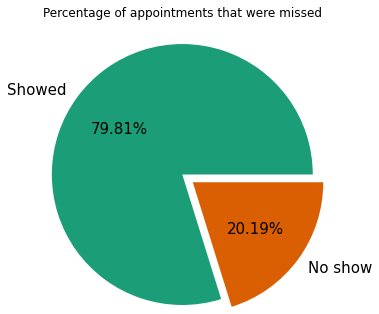

In [34]:
#pie chart showing the proportion of appointments that were missed in the dataset
data =show_up_prop
labels = ['Showed', 'No show']
colors = sns.color_palette('Dark2')[0:5]
plt.pie(data, colors = colors, labels = labels, autopct = '%0.2f%%', radius = 1.5, explode = (0, 0.15),textprops = {"fontsize":15})
plt.title("Percentage of appointments that were missed", y=1.2);


### 2. Is one gender more likely to show up for their appointment?

In [35]:
# Counting how many appointments belong to each gender
gender_count = df.groupby('gender').appointmentid.count()
gender_count

gender
F    71836
M    38685
Name: appointmentid, dtype: int64

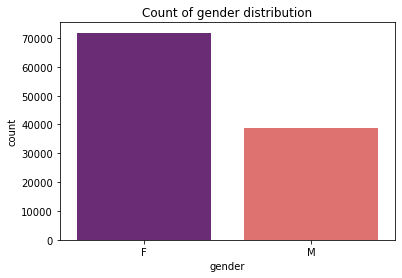

In [36]:
#Countplot of gender distribution in the dataset
sns.countplot(x="gender", data=df, palette = 'magma')
plt.title('Count of gender distribution');

>  ### There are over 71,000 female patients while the male patients are almost half that number at 38,685
    > * lets look at what gender kept their appointments the most

In [37]:
gender_show_count = df.groupby(['gender','no_show']).appointmentid.count()
gender_show_count

gender  no_show
F       No         57245
        Yes        14591
M       No         30962
        Yes         7723
Name: appointmentid, dtype: int64

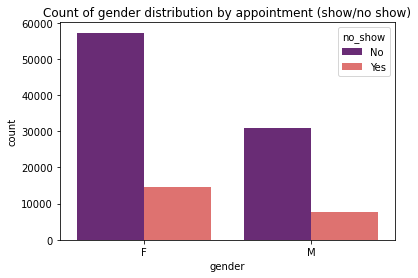

In [38]:
sns.countplot(x="gender", data=df, hue = 'no_show', palette = 'magma')
plt.title('Count of gender distribution by appointment (show/no show)');


> ### Almost 60,000 female patients showed up for their appointments while just over 30,000 male did
    > * More women showed up for appointments than men but there are also more women in the dataset so the numbers might be skewing the results
    > * I will now look at proportions to circumvent this limitation

In [39]:
gender_prop = (gender_show_count/gender_count) * 100
gender_prop

gender  no_show
F       No         79.688457
        Yes        20.311543
M       No         80.036190
        Yes        19.963810
Name: appointmentid, dtype: float64

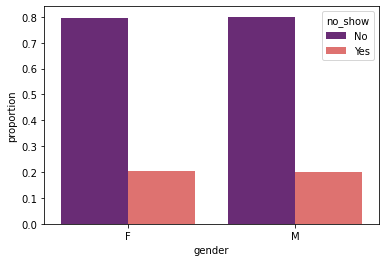

In [40]:
(df['no_show'].groupby(df['gender']).value_counts(normalize=True).rename('proportion').reset_index().
 pipe((sns.barplot, "data"), x='gender', y='proportion', hue='no_show', palette = 'magma'));

> ### After looking at proportions we can see that altough the show up count was higher for female patients, the percentage of patients that showed up for both genders were the same at approximatly 80% - with females even being lower by a miniscule 0.3%.

### 3. Does age affect showing up to appointments?

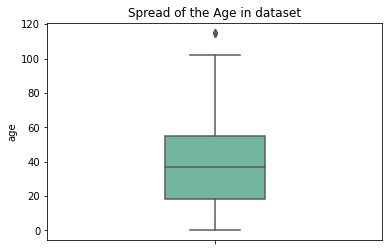

In [41]:
#the max age of 115 is an outlier
# I have chosen to leave it in because is quite possible that an older patient had an appointment
sns.boxplot(y = 'age', data = df, width = 0.3 , palette ='Set2')
plt.title("Spread of the Age in dataset");

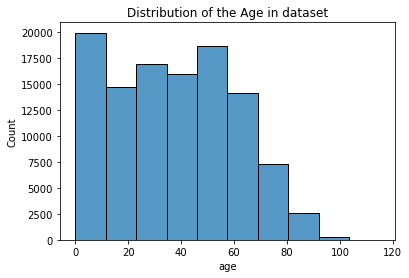

In [42]:
#age is left skewed which means most of the patients are younger
sns.histplot(data=df, x="age", bins = 10)
plt.title("Distribution of the Age in dataset");

In [43]:
df.groupby('no_show').age.mean()

no_show
No     37.790504
Yes    34.317872
Name: age, dtype: float64

>  ### The mean age of those who met their appointments is approximately 37, while for those who did not it is 34.
    > * It is possible that the older the patients, the more likely they are to show up to their appointment
    > * I will put the age in bins for a more detailed analysis

In [44]:
#binned the ages in the dataset using the quartiles of  the age column
df['age_group'] = pd.cut(df['age'], [0, 18, 37, 55, 115], labels = ['child','adult' ,'mid_age', 'elder'], include_lowest = True )

In [45]:
# Counting how many appointments were scheduled for each age group
age_total = df.groupby(['age_group']).count()['appointmentid']
age_total

age_group
child      28865
adult      27248
mid_age    26905
elder      27503
Name: appointmentid, dtype: int64

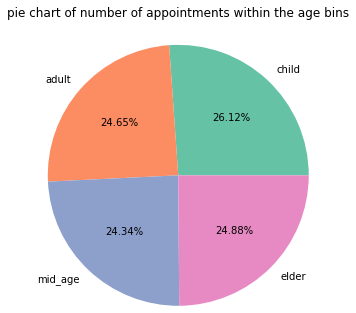

In [46]:
#there is a differerence less than 2% between the groups, with the child group having the most appointments
data =age_total
labels = ['child','adult', 'mid_age', 'elder']
colors = sns.color_palette('Set2')[0:5]
plt.pie(data, colors = colors, labels = labels, autopct = '%0.2f%%', radius = 1.5)
plt.title ("pie chart of number of appointments within the age bins", y = 1.2);

In [47]:
age_count = df.groupby(['age_group', 'no_show']).count()['appointmentid']
age_count

age_group  no_show
child      No         22519
           Yes         6346
adult      No         20836
           Yes         6412
mid_age    No         21651
           Yes         5254
elder      No         23201
           Yes         4302
Name: appointmentid, dtype: int64

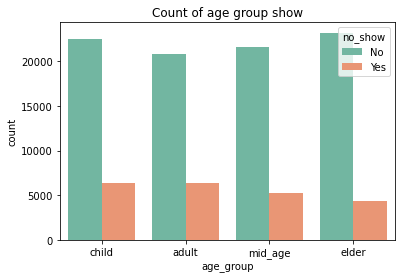

In [48]:
sns.countplot(x="age_group", data=df, hue = 'no_show', palette = 'Set2')
plt.title('Count of age group show');

>  ### As suspected, older patients showed up to their appointment in greater number than younger ones, altough those patients below 18 also showed up in large numbers
    > * I will examine the proportions so that a clearer picture can emerge

In [49]:
age_prop = (age_count/age_total) * 100
age_prop 

age_group  no_show
child      No         78.014897
           Yes        21.985103
adult      No         76.467998
           Yes        23.532002
mid_age    No         80.472031
           Yes        19.527969
elder      No         84.358070
           Yes        15.641930
Name: appointmentid, dtype: float64

> ### After looking at proportions we can see that age group of patients that showed up the most were the elder bin at 84% followed by those in the mid age bin at 80%. 

> ### Those in the adult bin showed the least in the age groups at 76% while 78% of those in the child bin showed up.

### 4. Did patients on scholarship show up for their appointments more than those not on scholarship?

In [50]:
#counting how many appointments were for patients on scholarship
scholar_total = df.groupby('scholarship').appointmentid.count()
scholar_total

scholarship
0    99660
1    10861
Name: appointmentid, dtype: int64

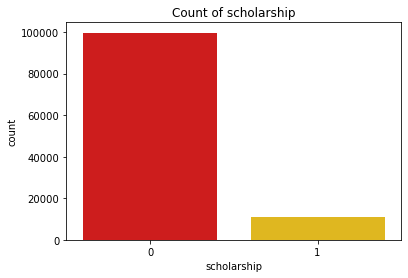

In [51]:
#Countplot of scholarship distribution in the dataset
sns.countplot(x="scholarship", data=df, palette = 'hot')
plt.title('Count of scholarship');

>  ### Just over 10,000 patients are on scholarship while over 99,000 patients are not on scholarship
    > * lets look at which of these groups showed up for appointments the most

In [52]:
scholar_count = df.groupby(['scholarship','no_show']).appointmentid.count()
scholar_count

scholarship  no_show
0            No         79924
             Yes        19736
1            No          8283
             Yes         2578
Name: appointmentid, dtype: int64

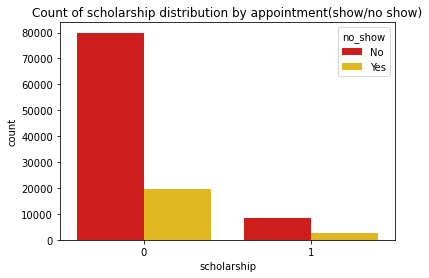

In [53]:
sns.countplot(x="scholarship", data=df, hue = 'no_show', palette = 'hot')
plt.title('Count of scholarship distribution by appointment(show/no show)');

> ### Almost 80,000 patients without showed up for their appointments while just over 8,000 patients on scholarship showed up
    > * There are also more patients not on scholarship in the dataset so the numbers might be skewing the results
    > * I will now look at proportions to circumvent this limitation

In [54]:
scholar_prop = (scholar_count/scholar_total) * 100
scholar_prop

scholarship  no_show
0            No         80.196669
             Yes        19.803331
1            No         76.263696
             Yes        23.736304
Name: appointmentid, dtype: float64

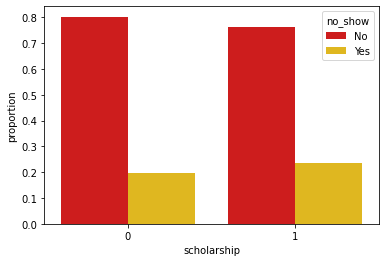

In [55]:
(df['no_show'].groupby(df['scholarship']).value_counts(normalize=True).rename('proportion').reset_index().
 pipe((sns.barplot, "data"), x='scholarship', y='proportion', hue='no_show', palette = 'hot'));

> ### After looking at proportions we can see that patients who were not on the scholarship program showed up more than those who were on it. No scholarship was 80%, while scholarship was 76%

> * I would like to examine the relationship between age and those patients on scholarship. 

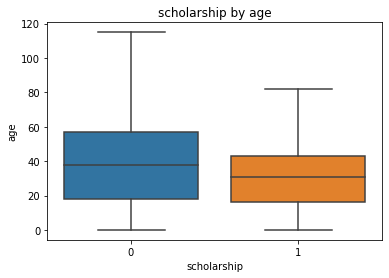

In [56]:
#correlation between age and scholarship
sns.boxplot(x = 'scholarship', y = 'age', data = df, showfliers = False)
plt.title('scholarship by age');

> ### As suspected the age of those patients on scholarship are younger than those not on scholarship is as in order to be eligible for the program they have to have children of school age.

### 5. Did  receiving sms messages have an effect on showing up to appointments?

In [57]:
#counting how many appointments received and did not receive sms messages
sms_count = df.groupby('sms_received').appointmentid.count()
sms_count

sms_received
0    75039
1    35482
Name: appointmentid, dtype: int64

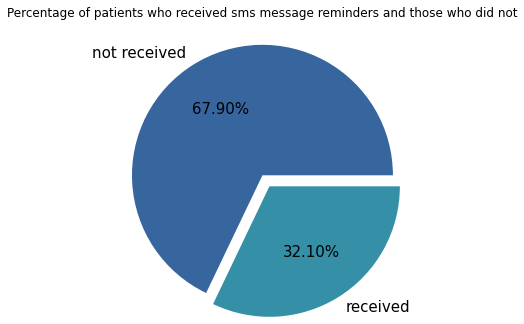

In [58]:
data =sms_count
labels = ['not received','received']
colors = sns.color_palette('mako')[2:4]
plt.pie(data, colors = colors, labels = labels, autopct = '%0.2f%%', radius = 1.5, explode = (0, 0.15),textprops = {"fontsize":15})
plt.title("Percentage of patients who received sms message reminders and those who did not", y=1.2);

>  ### A little over 75,000 patients did not receive sms messages while over 35,000 patients received sms messages
    > * lets look at which of these groups showed up for appointments the most

In [59]:
sms_show_count = df.groupby(['sms_received','no_show']).appointmentid.count()
sms_show_count

sms_received  no_show
0             No         62509
              Yes        12530
1             No         25698
              Yes         9784
Name: appointmentid, dtype: int64

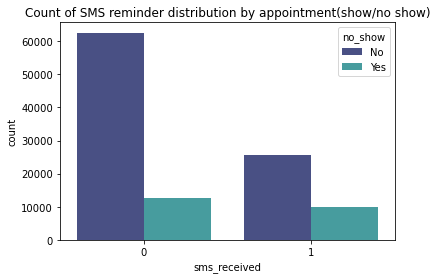

In [60]:
sns.countplot(x="sms_received", data=df, hue = 'no_show', palette = 'mako')
plt.title('Count of SMS reminder distribution by appointment(show/no show)');

> ### More than 60,000 patients who did not receive sms showed up for their appointments while just over 25,000 patients who received sms showed up
    > * There number of patients who did not receive sms is greater than those who did so the numbers might be skewing the results
    > * I will now look at proportions to circumvent this limitation

In [61]:
sms_prop = (sms_show_count/sms_count) * 100
sms_prop

sms_received  no_show
0             No         83.302016
              Yes        16.697984
1             No         72.425455
              Yes        27.574545
Name: appointmentid, dtype: float64

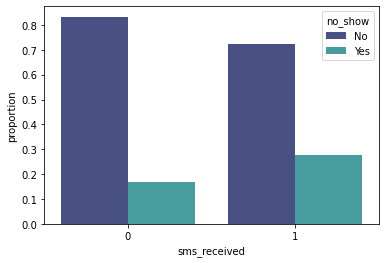

In [62]:
(df['no_show'].groupby(df['sms_received']).value_counts(normalize=True).rename('proportion').reset_index().
 pipe((sns.barplot, "data"), x='sms_received', y='proportion', hue='no_show', palette = 'mako'));

> ### Even after adjusting for the difference in the number of patients using proportions we can see that patients who did not receive sms showed up more than those who were on it. There is an 11% diffreence in show up proportion between the two groups.

> ### One explanation could be that sms reminders were sent to those who were late for their appointments with the intension of missing or skipping it already.

### 6. On what day of the week were most appointments scheduled?

In [63]:
#counting the number of appointments scheduled on each day
sched_count = df.groupby('sched_weekday').no_show.count().sort_values(ascending = False)
sched_count

sched_weekday
Tuesday      26167
Wednesday    24259
Monday       23084
Friday       18915
Thursday     18072
Saturday        24
Name: no_show, dtype: int64

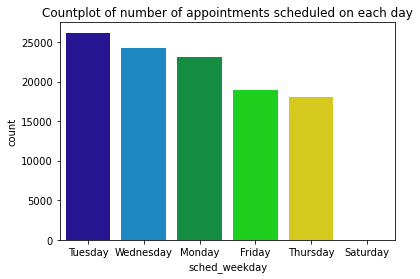

In [64]:
sns.countplot(x="sched_weekday", order = df['sched_weekday'].value_counts().index, data=df, palette = 'nipy_spectral')
plt.title('Countplot of number of appointments scheduled on each day');

>  ### The day with the highest number of appointments scheduled was Tuesday with over 26,000 appointments scheduled while saturday was the least with 24.

### 7. Which day of the week had the most appointments and which day had the most show up?

In [65]:
#counting the number of appointments on each day
appt_count = df.groupby('appt_weekday').appointmentid.count().sort_values(ascending = False)
appt_count

appt_weekday
Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: appointmentid, dtype: int64

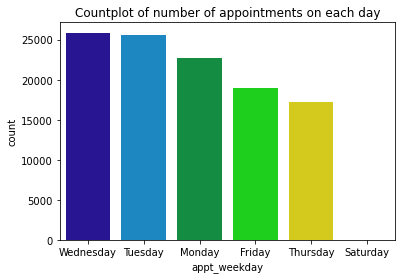

In [66]:
sns.countplot(x="appt_weekday", order = df['appt_weekday'].value_counts().index, data=df, palette = 'nipy_spectral')
plt.title('Countplot of number of appointments on each day');

>  ### The day with the highest number of appointments was Wednesday with over 25,866 appointments and Tuesday follows closely with 25,638.

> * This is expected because as the highest volume of appointments were scheduled on Tuesday and Wednesday, the patients were probably asked to come in the same or the next day to see a doctor

> * I will now investigate which of this appointment dates had the most number of show up


In [67]:
appt_day_show = df.groupby(['appt_weekday','no_show']).appointmentid.count()
appt_day_show

appt_weekday  no_show
Friday        No         14982
              Yes         4037
Monday        No         18024
              Yes         4689
Saturday      No            30
              Yes            9
Thursday      No         13909
              Yes         3337
Tuesday       No         20488
              Yes         5150
Wednesday     No         20774
              Yes         5092
Name: appointmentid, dtype: int64

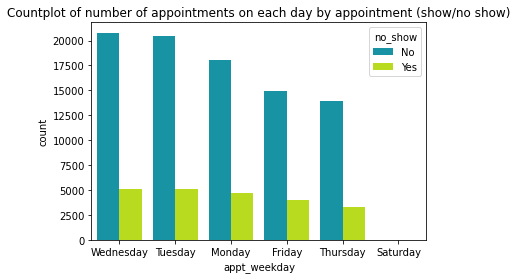

In [68]:
sns.countplot(x="appt_weekday", order = df['appt_weekday'].value_counts().index, data=df, hue = 'no_show', palette = 'nipy_spectral')
plt.title('Countplot of number of appointments on each day by appointment (show/no show)');

> ### The amount of people who showed up for appointments follows the same trend as the number of appointments per day i.e Wednesday followed by Tuesday with the least being saturday.  
    > *  I would however like to take a look at the number of patients who showed up to their appointments as a proportion of the total number of patients who had appointments on each day 

In [69]:
appt_prop =( appt_day_show/appt_count) * 100
appt_prop

appt_weekday  no_show
Friday        No         78.773858
              Yes        21.226142
Monday        No         79.355435
              Yes        20.644565
Saturday      No         76.923077
              Yes        23.076923
Thursday      No         80.650586
              Yes        19.349414
Tuesday       No         79.912630
              Yes        20.087370
Wednesday     No         80.313926
              Yes        19.686074
Name: appointmentid, dtype: float64

> ### After looking at proportions we can see that every day of the week had almost the same proportion of patients showing up, the difference betwen the highest show up day and the lowest was about 4%.

> ### Infact, contratry to what the countplot showed, a the proportion of people who showed up on Thurday surpassed those who showed up on wednesday and Tuesday by a minute and probably insignificant 0.3% and 0.7% respectively.

### 8. Does the amount of wait time between schedule day and appointment day affect showing up to appointments?

In [70]:
#The mean waittime is 10 days
df.waittime.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waittime, dtype: float64

In [71]:
#binned waittime in the dataset using the quartiles of the its column
df['wait_bins'] = pd.cut(df['waittime'], [0, 4, 8, 15, 30, 179], labels = ['few_days','a_week' ,'forthnight', 'a_month', 'over_a_month'], include_lowest = True )

In [72]:
#almost 60k people waited only 0-4 days for their appointment day
# Counting how many appointments belong to each bin
wait_count = df.groupby('wait_bins').no_show.count()
wait_count 

wait_bins
few_days        58527
a_week          14552
forthnight      11196
a_month         15868
over_a_month    10378
Name: no_show, dtype: int64

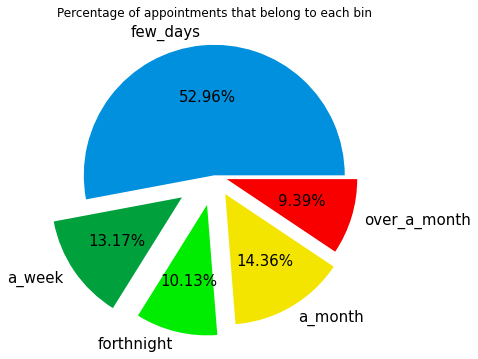

In [73]:
#pie chart of  patient distribution within the age bins
# they almost evenly distributed with differerence not more than 2% between the groups
data =wait_count
labels = ['few_days','a_week' ,'forthnight', 'a_month', 'over_a_month']
colors = sns.color_palette('nipy_spectral')[1:]
plt.pie(data, colors = colors, labels = labels, autopct = '%0.2f%%', radius = 1.5, explode = (0, 0.45, 0.35, 0.25, 0.15),textprops = {"fontsize":15})
plt.title("Percentage of appointments that belong to each bin", y=1.2);

In [74]:
wait_show = df.groupby(['wait_bins','no_show']).appointmentid.count()
wait_show

wait_bins     no_show
few_days      No         52145
              Yes         6382
a_week        No         10700
              Yes         3852
forthnight    No          7700
              Yes         3496
a_month       No         10709
              Yes         5159
over_a_month  No          6953
              Yes         3425
Name: appointmentid, dtype: int64

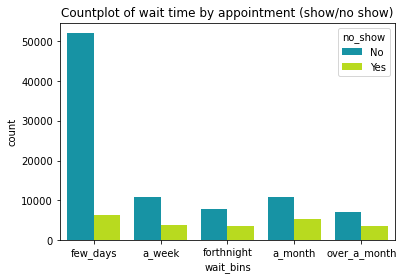

In [75]:
sns.countplot(x="wait_bins", data=df, hue = 'no_show', palette = 'nipy_spectral')
plt.title('Countplot of wait time by appointment (show/no show)');


>  ### As suspected, the longer the wait time between the schedule day and the appointment day the higher the number of patients who did not show.

In [76]:
wait_prop = (wait_show/wait_count) * 100
wait_prop

wait_bins     no_show
few_days      No         89.095631
              Yes        10.904369
a_week        No         73.529412
              Yes        26.470588
forthnight    No         68.774562
              Yes        31.225438
a_month       No         67.488026
              Yes        32.511974
over_a_month  No         66.997495
              Yes        33.002505
dtype: float64

> ### Looking at proportions we can see that the no_show percentage increased from 10% for those who waited for a few days to 26% - more than double- for those who waited a week. 

> ### The no_show percentage for those who waited a forthnight, a month and over a month were roughly the same at 31%, 32% and 33% respectively.

### 9. Do patients who have chronic illnesses (diabetes, hypertension , alcoholism) and handicap show up to their appointments more?

#### Hypertension

In [77]:
#the number of appointments with hypertensive patients in the dataset
hyp_count = df.groupby('hypertension').appointmentid.count()
hyp_count

hypertension
0    88720
1    21801
Name: appointmentid, dtype: int64

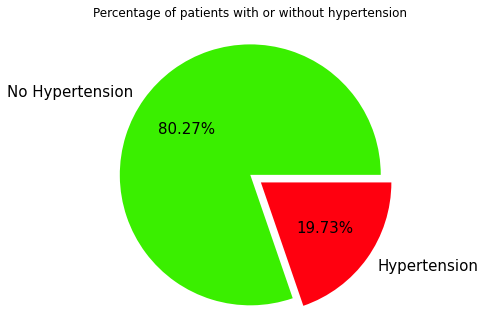

In [78]:
#pie chart of the number of appointments with hypertensive patients in the dataset
data =hyp_count
labels = ['No Hypertension','Hypertension']
colors = sns.color_palette('prism')[:]
plt.pie(data, colors = colors, labels = labels, autopct = '%0.2f%%', radius = 1.5, explode = (0, 0.15),textprops = {"fontsize":15})
plt.title("Percentage of patients with or without hypertension", y=1.2);

In [79]:
hyp_show_count = df.groupby(['hypertension','no_show']).appointmentid.count()
hyp_show_count

hypertension  no_show
0             No         70178
              Yes        18542
1             No         18029
              Yes         3772
Name: appointmentid, dtype: int64

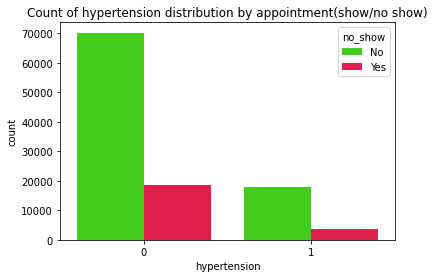

In [80]:
sns.countplot(x="hypertension", data=df, hue = 'no_show', palette = 'prism')
plt.title('Count of hypertension distribution by appointment(show/no show)');

> ### The number of patients with hypertension is much less than those without so, I will look at proportions to get a true estimate of their show up habits

In [81]:
hyp_prop = (hyp_show_count/hyp_count) * 100
hyp_prop

hypertension  no_show
0             No         79.100541
              Yes        20.899459
1             No         82.698041
              Yes        17.301959
Name: appointmentid, dtype: float64

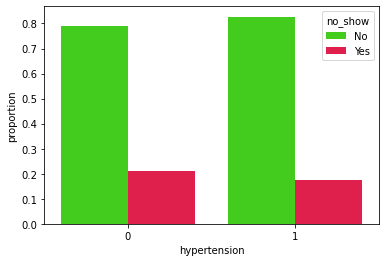

In [82]:
(df['no_show'].groupby(df['hypertension']).value_counts(normalize=True).rename('proportion').reset_index().
 pipe((sns.barplot, "data"), x='hypertension', y='proportion', hue='no_show', palette = 'prism'));

> ### After looking at proportions we can see that even though the show up count was higher for people were not hypertension, approximately 82% of hypertensives showed up for their appointments compared to 79% of non-hypertensives


#### Diabetes

In [83]:
#the number of appointments with diabetic patients in the dataset
diab_count = df.groupby('diabetes').appointmentid.count()
diab_count

diabetes
0    102578
1      7943
Name: appointmentid, dtype: int64

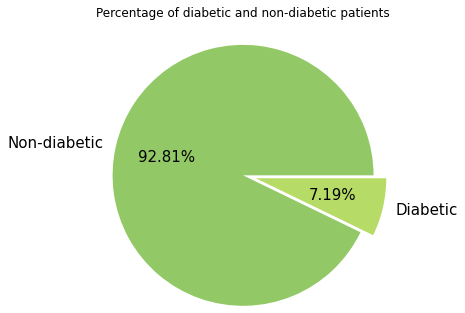

In [84]:
#pie chart of the number of appointments with diabetic patients in the dataset
data =diab_count
labels = ['Non-diabetic','Diabetic']
colors = sns.color_palette('summer')[3:5]
plt.pie(data, colors = colors, labels = labels, autopct = '%0.2f%%', radius = 1.5, explode = (0, 0.15),textprops = {"fontsize":15})
plt.title("Percentage of diabetic and non-diabetic patients", y=1.2);

>  ### Only about 7% of the patients in the dataset are diabetic
    > * lets look at which group kept their appointments the most

In [85]:
diab_show_count = df.groupby(['diabetes','no_show']).appointmentid.count()
diab_show_count

diabetes  no_show
0         No         81694
          Yes        20884
1         No          6513
          Yes         1430
Name: appointmentid, dtype: int64

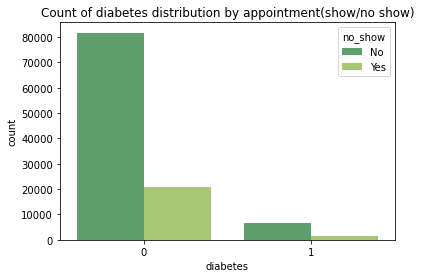

In [86]:
sns.countplot(x="diabetes", data=df, hue = 'no_show', palette = 'summer')
plt.title('Count of diabetes distribution by appointment(show/no show)');

> ### The number of patients with diabetes is much less than those without so, I will look at proportions to get a true estimate of their show up habits

In [87]:
diab_prop = (diab_show_count/diab_count) * 100
diab_prop

diabetes  no_show
0         No         79.640859
          Yes        20.359141
1         No         81.996727
          Yes        18.003273
Name: appointmentid, dtype: float64

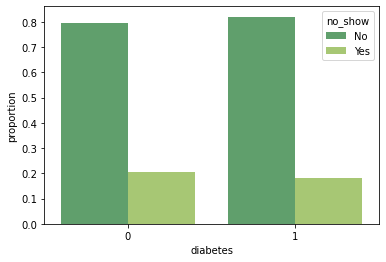

In [88]:
(df['no_show'].groupby(df['diabetes']).value_counts(normalize=True).rename('proportion').reset_index().
 pipe((sns.barplot, "data"), x='diabetes', y='proportion', hue='no_show', palette = 'summer'));

> ### After looking at proportions we can see that even though the show up count was higher for people were not hypertension, approximately 81% of diabetics showed up for their appointments compared to 79% of non-diabetics


#### Alcoholism

In [89]:
#the number of appointments with alcoholic patients in the dataset
alc_count = df.groupby('alcoholism').appointmentid.count()
alc_count

alcoholism
0    107161
1      3360
Name: appointmentid, dtype: int64

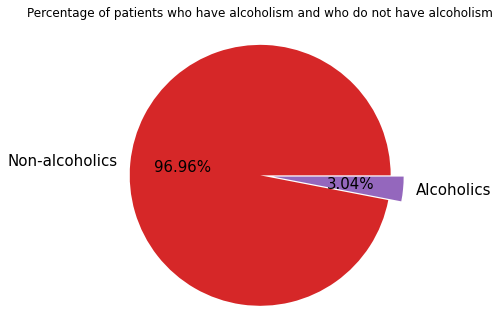

In [90]:
#pie chart of the number of appointments with alcoholic patients in the dataset
data =alc_count
labels = ['Non-alcoholics','Alcoholics']
colors = sns.color_palette('tab10')[3:5]
plt.pie(data, colors = colors, labels = labels, autopct = '%0.2f%%', radius = 1.5, explode = (0, 0.15),textprops = {"fontsize":15})
plt.title("Percentage of patients who have alcoholism and who do not have alcoholism", y=1.2);

>  ### Only about 3% of the patients in the dataset are alcoholics
    > * lets look at which group kept their appointments the most

In [91]:
alc_show_count = df.groupby(['alcoholism','no_show']).appointmentid.count()
alc_show_count

alcoholism  no_show
0           No         85524
            Yes        21637
1           No          2683
            Yes          677
Name: appointmentid, dtype: int64

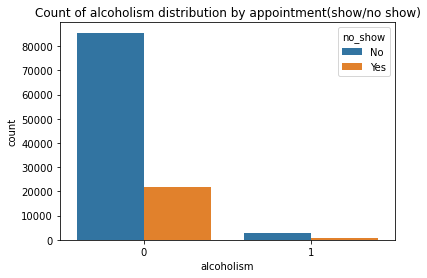

In [92]:
sns.countplot(x="alcoholism", data=df, hue = 'no_show', palette = 'tab10')
plt.title('Count of alcoholism distribution by appointment(show/no show)');

> ### The number of alcoholic patients is much less than those without so I will look at proportions to get a true estimate of their show up habits

In [93]:
alc_prop = (alc_show_count/alc_count) * 100
alc_prop

alcoholism  no_show
0           No         79.808886
            Yes        20.191114
1           No         79.851190
            Yes        20.148810
Name: appointmentid, dtype: float64

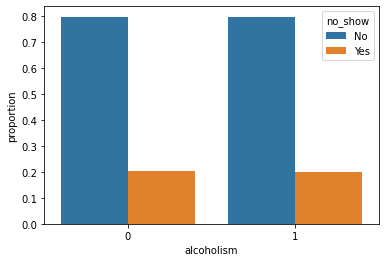

In [94]:
(df['no_show'].groupby(df['alcoholism']).value_counts(normalize=True).rename('proportion').reset_index().
 pipe((sns.barplot, "data"), x='alcoholism', y='proportion', hue='no_show', palette = 'tab10'));

> ### After looking at proportions we can see that even though the show up count was higher for people were not alcoholics, the percentage of patients who showed up were equal for both groups at approximately 80% each


#### Handicap

In [95]:
#the number of appointments with handicap patients in the dataset
hand_count = df.groupby('handicap').appointmentid.count()
hand_count

handicap
0    108282
1      2239
Name: appointmentid, dtype: int64

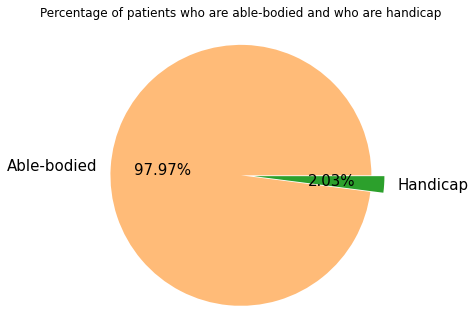

In [96]:
#pie chart of the number of appointments with handicap patients in the dataset
data =hand_count
labels = ['Able-bodied','Handicap']
colors = sns.color_palette('tab20')[3:5]
plt.pie(data, colors = colors, labels = labels, autopct = '%0.2f%%', radius = 1.5, explode = (0, 0.15),textprops = {"fontsize":15})
plt.title("Percentage of patients who are able-bodied and who are handicap", y=1.2);

>  ### Only about 2% of the patients in the dataset are handicap
    > * lets look at which group kept their appointments the most

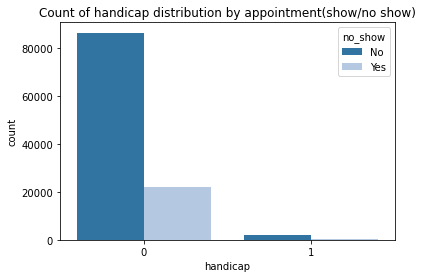

In [97]:
sns.countplot(x="handicap", data=df, hue = 'no_show', palette = 'tab20')
plt.title('Count of handicap distribution by appointment(show/no show)');

In [98]:
hand_show_count = df.groupby(['handicap','no_show']).appointmentid.count()
hand_show_count

handicap  no_show
0         No         86373
          Yes        21909
1         No          1834
          Yes          405
Name: appointmentid, dtype: int64

> ### The number of handicap patients is much less than those patients that are able-bodied so I will look at proportions to get a true estimate of their show up habits

In [99]:
hand_prop = (hand_show_count/hand_count) * 100
hand_prop

handicap  no_show
0         No         79.766720
          Yes        20.233280
1         No         81.911568
          Yes        18.088432
Name: appointmentid, dtype: float64

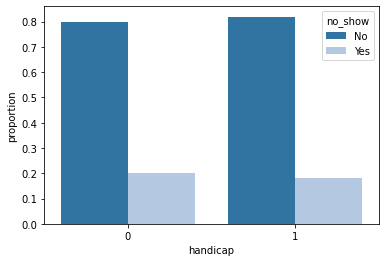

In [100]:
(df['no_show'].groupby(df['handicap']).value_counts(normalize=True).rename('proportion').reset_index().
 pipe((sns.barplot, "data"), x='handicap', y='proportion', hue='no_show', palette = 'tab20'));

> ### After looking at proportions we can see that even though the show up count was higher for able-bodied patients, the percentage of handicap patients who showed up was higher by about 2%


> ### The analysis shows that patients with illness and handicap show up more for their appointments than those without. I suspect this may be related to the age as most of these illnesses are often found in the older population.
    > * I will now look at the correlation between illnesses/handicap and age  

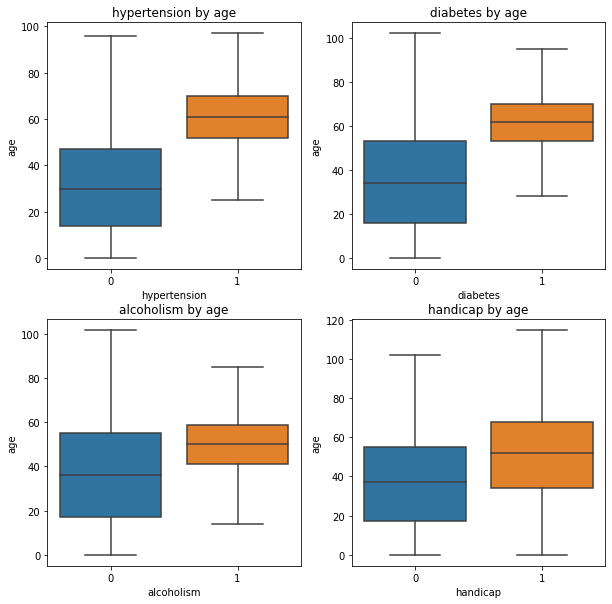

In [102]:
#viewing the correlation between illnesses/handicap and age 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'hypertension', y = 'age', data = df, showfliers = False)
plt.title('hypertension by age')
plt.subplot(2,2,2)
sns.boxplot(x = 'diabetes', y = 'age', data = df, showfliers = False)
plt.title('diabetes by age')
plt.subplot(2,2,3)
sns.boxplot(x = 'alcoholism', y = 'age', data = df, showfliers = False)
plt.title('alcoholism by age')
plt.subplot(2,2,4)
sns.boxplot(x = 'handicap', y = 'age', data = df, showfliers = False)
plt.title('handicap by age');

> ### As suspected patients with illness and handicap are older, which might explain why these group of people keep their appointments. They would take their health more seriously than those who are younger and able-bodied

<a id='conclusions'></a>
## Conclusions

####  How many appointments were no shows ?

> * The dataset consisted of 110521 appointment records of which 22,314 or approximately **20% of appointments were missed**

#### Is one gender more likely to show up for their appointment?

> * There were 71,836 female patients and  38,685 male patients in the dataset.

> * My analysis showed that one gender was **NOT** more likely to show up to appointments than the other as approximately 80% of patients in both gender turned up for their appointment.


#### Does age affect showing up to appointments?

> * The mean age of patients who showed up to their appointments was higher than patients who did not by 3 years. 

> * After binning the age column in 4 groups - 'child','adult' ,'mid_age', 'elder'- my analysis showed that **patients who were in the older bins - 'mid-age' and 'elder' had the highest percentage of show up for appointments.**

> * Adults between the ages 18-37 had the highest missed appointments

#### Did patients on scholarship show up for their appointments more than those not on scholarship?

>* Patients who were on scholarship **DID NOT** show up for their appointments as much as patients who were not on scholarship.

> * There was a 4% difference between both groups. It is also noteworthy that the mean age of patients on the scholarship program is much younger than those not on scholarship.

#### Did receiving sms messages have an effect on showing up to appointments?

> * Patients who received sms messages showed up **LESS** than those who did not receive messages. There is an 11% diffreence in show up proportion between the two groups.

> * This could possibly be because sms reminders were sent to those who missed their appoinments already.

#### On what day of the week were most appointments scheduled?

> * **TUESDAY** was the day when most appointments were scheduled. 

#### Which day of the week had the most appointments and which day had the most show up?

> * The day with the highest number of appointments was **WEDNESDAY**.This could be because as most appointments were scheduled on Tuesday, the patients were probably asked to come in the next day to see a doctor

> * The day with the highest number of people showing up to appointments was **a tie between WEDNESDAY and THURSDAY**.

#### Does the amount of wait time between schedule day and appointment day affect showing up to appointments?

> * The amount of wait time between schedule day and appointment day **has an effect** on the likely hood of patients showing up as **the longer the wait time the higher the number of appointments that were missed.**

> * Those who waited a few days had the highest percentage of show up while those who waited for longer than a week had the least amount

#### Do patients who have chronic illnesses (diabetes, hypertension, alcoholism) and handicap show up to their appointments more?

> * Patients who had illnesses (diabetes, hypertension & alcoholism) and handicap showed up for appointments **MORE** than those who did not.

> * It is noteworthy that these patients also had higher mean ages, they probably take their health more seriously than those who are younger and able-bodied


<a id='limit'></a>
## Limitations




> The data only covers records of a period just over a month (29/04/2016 - 08/06/2016) this is a very small sample, better analysis could be done if the dataset covered a year.

> There is no information on whether a patient cancelled the appointment or skipped it

> There wasn't much information on the SMS, only if it was recieved or not. It would have been helpful to know when it was sent and which groups were targeted.


<a id='refr'></a>
## References




https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe

https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas

https://stackoverflow.com/questions/53182464/pandas-delete-a-row-in-a-dataframe-based-on-a-value

https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe

https://stackoverflow.com/questions/41405180/python-pandas-filter-one-column-and-get-the-average-of-another-column

https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://www.kaggle.com/joniarroba/noshowappointments

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://www.geeksforgeeks.org/grouped-boxplots-in-python-with-seaborn/